In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [133]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [135]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [137]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [138]:
df.duplicated().sum()

0

**data cleaning**

In [139]:
df.drop(['id'], axis = 1, inplace = True)

In [140]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [141]:
df['bmi'].fillna(df['bmi'].mean() , inplace=True)

In [142]:
df.isna().sum().sum()

0

**check for outliers**

In [143]:
df_numeric = df.select_dtypes(include = [np.number])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_numeric_mean_replaced = df_numeric.copy()
for col in df_numeric.columns:
    mean = df_numeric[col].mean()
    df_numeric_mean_replaced[col] = np.where(
        (df_numeric[col] < lower_bound[col]) | (df_numeric[col] > upper_bound[col]),
        mean,
        df_numeric[col]
    )

df[df_numeric.columns] = df_numeric_mean_replaced

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.000000,0.054012,Yes,Private,Urban,106.147677,36.600000,formerly smoked,0.048728
1,Female,61.0,0.000000,0.000000,Yes,Self-employed,Rural,106.147677,28.893237,never smoked,0.048728
2,Male,80.0,0.000000,0.054012,Yes,Private,Rural,105.920000,32.500000,never smoked,0.048728
3,Female,49.0,0.000000,0.000000,Yes,Private,Urban,106.147677,34.400000,smokes,0.048728
4,Female,79.0,0.097456,0.000000,Yes,Self-employed,Rural,106.147677,24.000000,never smoked,0.048728


**Encoding and Scaling**

In [144]:
lb = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = lb.fit_transform(df[col])

In [145]:
x = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [146]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

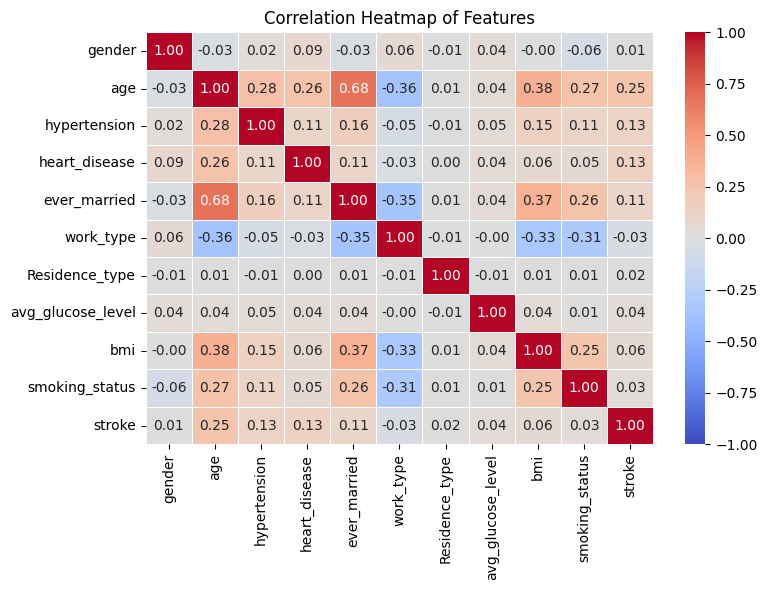

In [147]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmax=1, vmin=-1)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

**Splitting the data**

In [148]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **SVM Model buliding**

In [150]:
svm_model = SVC(kernel='linear', random_state=42)

In [151]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [152]:
y_pred = svm_model.predict(x_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.2f} %")
print(f"Precision: {precision:.2f} %")
print(f"Recall: {recall:.2f} %")
print(f"F1 Score: {f1:.2f} %")


Accuracy: 0.94 %
Precision: 0.88 %
Recall: 0.94 %
F1 Score: 0.91 %


In [154]:
# Detailed classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



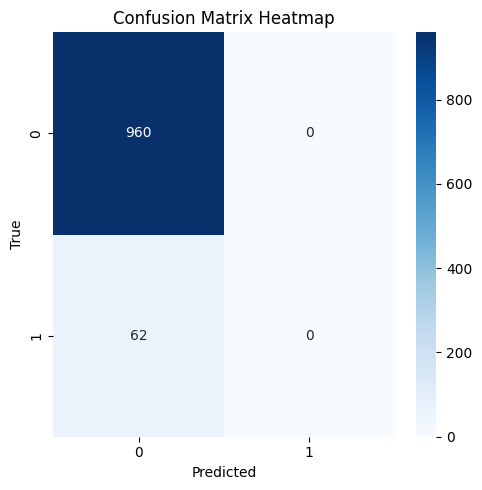

In [155]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

# **Random Forest Model buliding**

In [156]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [157]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [158]:
y_pred_rf = rf_model.predict(x_test)

In [159]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy_rf:.2f} %")
print(f"Precision: {precision_rf:.2f} %")
print(f"Recall: {recall_rf:.2f} %")
print(f"F1 Score: {f1_rf:.2f} %")

Accuracy: 0.94 %
Precision: 0.88 %
Recall: 0.94 %
F1 Score: 0.91 %


In [160]:
# Detailed classification report
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



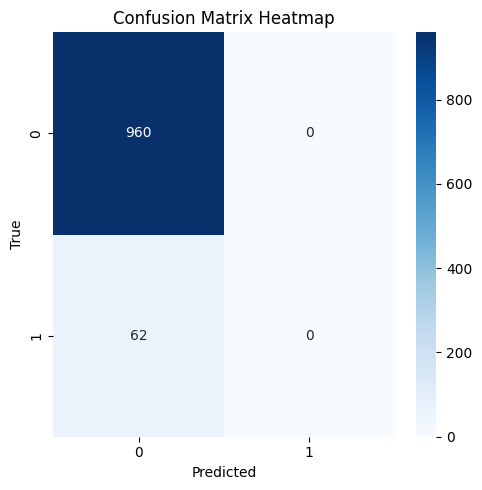

In [161]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

# **KNN Model Building**

In [162]:
knn_model = KNeighborsClassifier()

In [163]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [164]:
y_pred_knn = knn_model.predict(x_test)

In [165]:
# Evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy_knn:.2f} %")
print(f"Precision: {precision_knn:.2f} %")
print(f"Recall: {recall_knn:.2f} %")
print(f"F1 Score: {f1_knn:.2f} %")


Accuracy: 0.94 %
Precision: 0.91 %
Recall: 0.94 %
F1 Score: 0.91 %


In [166]:
print("\nClassification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



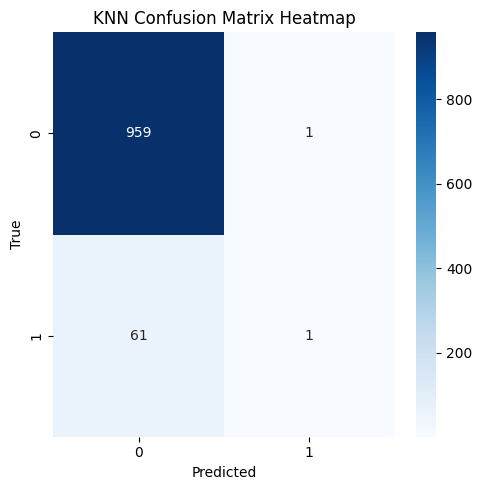

In [167]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [168]:
# Print comparison of accuracies
print(f"Accuracy of SVM: {accuracy:.2f}%")
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}%")
print(f"Accuracy of KNN: {accuracy_knn:.2f}%")


Accuracy of SVM: 0.94%
Accuracy of Random Forest: 0.94%
Accuracy of KNN: 0.94%


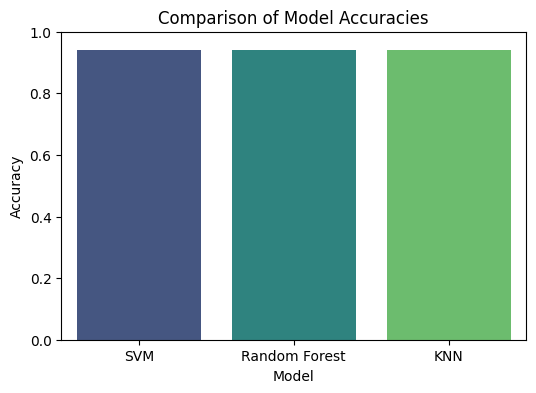

In [169]:
# Plot comparison of accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits to show the accuracy range (0 to 1)
plt.show()